In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import joblib
import sys
from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


# remove warnings
import warnings

# Suppress specific warnings
warnings.filterwarnings('ignore', category=RuntimeWarning, module='pandas.io.formats.format')

# 1. Loading Dataset

In [2]:
# Loading the data
new_data = pd.read_csv("/kaggle/input/seperated-data/Bangladesh_Dhaka.csv")

# print the shape
print(new_data.shape)

#runs the first 5 rows
new_data.head()

(2104, 12)


,Date,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
0,2016-03-08,NaN,NaN,NaN,NaN,182.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka
1,2016-03-09,NaN,NaN,NaN,NaN,168.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka
2,2016-03-10,NaN,NaN,NaN,NaN,171.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka
3,2016-03-11,NaN,NaN,NaN,NaN,171.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka
4,2016-03-12,NaN,NaN,NaN,NaN,178.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka


In [3]:
# Find the minimum and maximum dates
min_date = new_data['Date'].min()
max_date = new_data['Date'].max()

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date: 2016-03-08
Maximum date: 2023-12-31


In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2104 non-null   object 
 1   co            0 non-null      float64
 2   no2           0 non-null      float64
 3   o3            0 non-null      float64
 4   pm10          0 non-null      float64
 5   pm25          2104 non-null   float64
 6   so2           0 non-null      float64
 7   humidity      1645 non-null   float64
 8   pressure      1642 non-null   float64
 9   temperature   1645 non-null   float64
 10  wind-speed    1461 non-null   float64
 11  Country_City  2104 non-null   object 
dtypes: float64(10), object(2)
memory usage: 197.4+ KB


In [5]:
new_data.describe()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed
count,0.0,0.0,0.0,0.0,2104.000000,0.0,1645.000000,1642.000000,1645.000000,1461.000000
mean,NaN,NaN,NaN,NaN,151.962452,NaN,69.798784,1008.335627,26.751489,2.851745
std,NaN,NaN,NaN,NaN,63.441085,NaN,8.048794,5.314941,3.788551,1.129471
min,NaN,NaN,NaN,NaN,9.000000,NaN,40.500000,992.000000,14.000000,0.700000
25%,NaN,NaN,NaN,NaN,99.000000,NaN,65.000000,1004.000000,24.500000,2.000000
50%,NaN,NaN,NaN,NaN,153.000000,NaN,70.000000,1008.500000,28.000000,2.500000
75%,NaN,NaN,NaN,NaN,187.000000,NaN,74.000000,1013.000000,29.500000,3.600000
max,NaN,NaN,NaN,NaN,433.000000,NaN,94.000000,1019.500000,33.000000,7.200000


In [6]:
# Investigate all the elements whithin each Feature

for column in new_data:
    # Handle numerical and string columns differently
    if new_data[column].dtype == 'object':  # Check if column is of object type
        unique_vals = new_data[column].unique()  # pandas unique for strings
    else:
        unique_vals = np.unique(new_data[column])  # numpy unique for numerical types

    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :2104
The number of values for feature co :1 -- [nan]
The number of values for feature no2 :1 -- [nan]
The number of values for feature o3 :1 -- [nan]
The number of values for feature pm10 :1 -- [nan]
The number of values for feature pm25 :232
The number of values for feature so2 :1 -- [nan]
The number of values for feature humidity :80
The number of values for feature pressure :55
The number of values for feature temperature :59
The number of values for feature wind-speed :27
The number of values for feature Country_City :1 -- ['Bangladesh_Dhaka']


In [7]:
new_data.isna().sum()

Date               0
co              2104
no2             2104
o3              2104
pm10            2104
pm25               0
so2             2104
humidity         459
pressure         462
temperature      459
wind-speed       643
Country_City       0
dtype: int64

# 1.2 - Function -- Preprocessing

In [9]:
print(os.listdir('/kaggle/usr/lib/'))

['function-v']


In [10]:
sys.path.append("/kaggle/usr/lib/function_v")  # Add directory to the path

import function_v as fn

### Datetime index 

In [11]:
# Use the functions
new_data1 = fn.prepare_datetime_index(new_data, date_column='Date')
new_data1.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
Date,,,,,,,,,,,
2016-03-08,NaN,NaN,NaN,NaN,182.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka
2016-03-09,NaN,NaN,NaN,NaN,168.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka
2016-03-10,NaN,NaN,NaN,NaN,171.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka
2016-03-11,NaN,NaN,NaN,NaN,171.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka
2016-03-12,NaN,NaN,NaN,NaN,178.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka


In [12]:
new_data1.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City'],
      dtype='object')

In [13]:
# Drop collumns which have large quantity of missing value and of no use
new_data2 = new_data1.drop(['co', 'no2', 'o3', 'pm10', 'so2', 'Country_City'], axis= 1)

In [14]:
new_data2.isna().sum()

pm25             0
humidity       459
pressure       462
temperature    459
wind-speed     643
dtype: int64

### Imputing 

In [15]:
# Fill the missing value 

imputer = SimpleImputer(strategy="mean")

# Select the columns
columns_to_impute = ['humidity', 'pressure', 'temperature', 'wind-speed']

new_data2[columns_to_impute] = imputer.fit_transform(new_data2[columns_to_impute])

In [16]:
new_data2.isna().sum()

pm25           0
humidity       0
pressure       0
temperature    0
wind-speed     0
dtype: int64

### Missing Dates

In [17]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data2.index.min(), end=new_data2.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data2.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex(['2016-07-04', '2016-07-05', '2016-07-06', '2016-07-07',
               '2016-07-08', '2016-07-09', '2016-07-10', '2016-07-11',
               '2016-07-12', '2016-07-13',
               ...
               '2023-09-15', '2023-09-16', '2023-09-17', '2023-09-18',
               '2023-09-19', '2023-09-20', '2023-09-21', '2023-09-22',
               '2023-09-23', '2023-09-24'],
              dtype='datetime64[ns]', length=751, freq=None)


In [18]:
new_data3 = fn.impute_missing_dates(new_data2)

In [19]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data3.index.min(), end=new_data3.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data3.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [20]:
duplicates = new_data3.index[new_data3.index.duplicated()]
print(f"Duplicate indexes: {duplicates}")

Duplicate indexes: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


### AQI Count

In [21]:
new_data4 = fn.calculate_aqi(new_data3)

In [22]:
new_data4.head()

,pm25,humidity,pressure,temperature,wind-speed,AQI
2016-03-08,182.0,69.798784,1008.335627,26.751489,2.851745,182.0
2016-03-09,168.0,69.798784,1008.335627,26.751489,2.851745,168.0
2016-03-10,171.0,69.798784,1008.335627,26.751489,2.851745,171.0
2016-03-11,171.0,69.798784,1008.335627,26.751489,2.851745,171.0
2016-03-12,178.0,69.798784,1008.335627,26.751489,2.851745,178.0


# 1.3 - Plot & Heatmap

<Axes: >

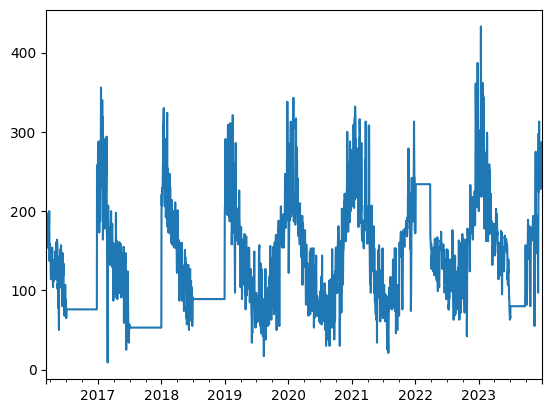

In [23]:
norm_aqi = new_data4['AQI']
norm_aqi.plot()

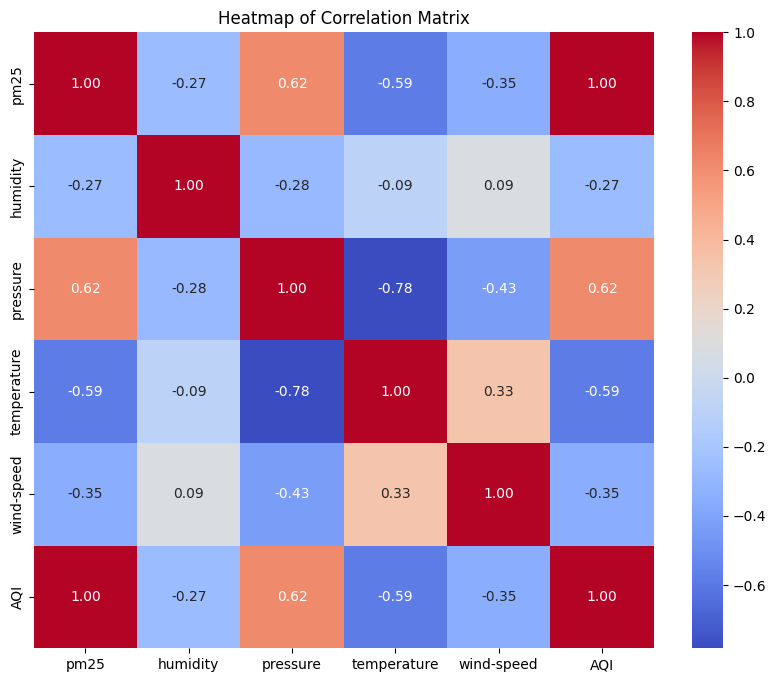

In [24]:
# Calculate the correlation matrix for numeric columns
corr = new_data4.corr(numeric_only=True)

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Correlation Matrix")
#file_name = "correlation_matrix.png"
#path = "/kaggle/working/"
#plt.savefig(path + file_name)
plt.show()

# 2. Machine Learning (without scaling)

## 2.1. Splitting & Preprocessing the Raw Data(Normal AQI)

In [25]:
new_data4.columns

Index(['pm25', 'humidity', 'pressure', 'temperature', 'wind-speed', 'AQI'], dtype='object')

In [26]:
data = new_data4.copy()

In [27]:
data.head()

,pm25,humidity,pressure,temperature,wind-speed,AQI
2016-03-08,182.0,69.798784,1008.335627,26.751489,2.851745,182.0
2016-03-09,168.0,69.798784,1008.335627,26.751489,2.851745,168.0
2016-03-10,171.0,69.798784,1008.335627,26.751489,2.851745,171.0
2016-03-11,171.0,69.798784,1008.335627,26.751489,2.851745,171.0
2016-03-12,178.0,69.798784,1008.335627,26.751489,2.851745,178.0


In [28]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['pm25', 'humidity', 'pressure', 'temperature', 'wind-speed', 'AQI'], dtype='object')
Index([], dtype='object')


In [29]:
X = data[['pm25', 'humidity', 'pressure', 'temperature', 'wind-speed']]

y = data['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2284, 5) (2284,) (571, 5) (571,)


In [30]:
# Preprocessor without scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['pm25', 'humidity', 'pressure', 'temperature', 'wind-speed'])
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

## 2.2. ML Model

In [31]:
def compare_and_save_models(X_train, X_test, y_train, y_test, preprocessor, metric='mse', save_dir='models'):
    
    
    # Initialize models
    models = {
        'knn': KNeighborsRegressor(n_neighbors=2),
        'random_forest': RandomForestRegressor(),
        'xgboost': XGBRegressor(objective='reg:squarederror'),
        'svr' : SVR(kernel='linear'),
        'neural_network': MLPRegressor(hidden_layer_sizes=(8,), activation='relu', 
                                     solver='adam', max_iter=2000, 
                                     learning_rate_init=0.0005)
    }
    
    # Dictionary to store results
    results = {}
    
    # Create save directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Train and evaluate each model
    for name, model in models.items():
        # Create pipeline
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                                 ('regressor', model)])
        
        # Train model
        pipeline.fit(X_train, y_train)
        
        # Make predictions
        y_pred_train = pipeline.predict(X_train)
        y_pred_test = pipeline.predict(X_test)
        
        # Calculate metrics
        metrics = {
            'r2_train': r2_score(y_train, y_pred_train),
            'r2_test': r2_score(y_test, y_pred_test),
            'rmse_train': sqrt(mean_squared_error(y_train, y_pred_train)),
            'rmse_test': sqrt(mean_squared_error(y_test, y_pred_test)),
            'mae_train': mean_absolute_error(y_train, y_pred_train),
            'mae_test': mean_absolute_error(y_test, y_pred_test),
            'mse_train': mean_squared_error(y_train, y_pred_train),
            'mse_test': mean_squared_error(y_test, y_pred_test)
        }
        
        results[name] = {
            'pipeline': pipeline,
            'metrics': metrics
        }
    
    # Determine best model based on specified metric
    metric_map = {
        'r2': 'r2_test',
        'rmse': 'rmse_test',
        'mae': 'mae_test',
        'mse': 'mse_test'
    }
    
    comparison_metric = metric_map[metric]
    
    if metric == 'r2':  # Only R² should use max, all others should use min
        best_model = max(results.items(), 
                        key=lambda x: x[1]['metrics'][comparison_metric])
    else:  # For MSE, RMSE, MAE - lower is better
        best_model = min(results.items(), 
                        key=lambda x: x[1]['metrics'][comparison_metric])
    
    # Save the best model
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_path = os.path.join(save_dir, 
                             f'best_model_{best_model[0]}_{timestamp}.joblib')
    joblib.dump(best_model[1]['pipeline'], model_path)
    
    # Prepare return dictionary
    return_dict = {
        'best_model': best_model[0],
        'best_model_path': model_path,
        'model_performances': {name: results[name]['metrics'] 
                             for name in results.keys()}
    }
    
    return return_dict

In [32]:
# Get the results first
results = compare_and_save_models(
    X_train, X_test, y_train, y_test,
    preprocessor,
    metric='mse',
    save_dir='models'
)

In [33]:
# Print detailed results for all models
print("\nDetailed Model Performance Summary:")
print("-" * 50)

for model_name, performance in results['model_performances'].items():
    print(f"\n{model_name.upper()} Results:")
    print(f"R² score (train): {performance['r2_train']:.4f}")
    print(f"R² score (test): {performance['r2_test']:.4f}")
    print(f"RMSE (train): {performance['rmse_train']:.4f}")
    print(f"RMSE (test): {performance['rmse_test']:.4f}")
    print(f"MAE (train): {performance['mae_train']:.4f}")
    print(f"MAE (test): {performance['mae_test']:.4f}")
    print(f"MSE (train): {performance['mse_train']:.4f}")
    print(f"MSE (test): {performance['mse_test']:.4f}")

print("\n" + "=" * 50)
print(f"Best Model: {results['best_model']}")
print(f"Model saved at: {results['best_model_path']}")


Detailed Model Performance Summary:
--------------------------------------------------

KNN Results:
R² score (train): 0.9998
R² score (test): 0.9995
RMSE (train): 1.0176
RMSE (test): 1.5226
MAE (train): 0.3796
MAE (test): 0.6594
MSE (train): 1.0355
MSE (test): 2.3183

RANDOM_FOREST Results:
R² score (train): 0.9999
R² score (test): 0.9997
RMSE (train): 0.5967
RMSE (test): 1.1870
MAE (train): 0.0381
MAE (test): 0.1032
MSE (train): 0.3561
MSE (test): 1.4089

XGBOOST Results:
R² score (train): 1.0000
R² score (test): 0.9997
RMSE (train): 0.0500
RMSE (test): 1.1759
MAE (train): 0.0271
MAE (test): 0.1480
MSE (train): 0.0025
MSE (test): 1.3829

SVR Results:
R² score (train): 1.0000
R² score (test): 1.0000
RMSE (train): 0.0387
RMSE (test): 0.0397
MAE (train): 0.0320
MAE (test): 0.0336
MSE (train): 0.0015
MSE (test): 0.0016

NEURAL_NETWORK Results:
R² score (train): 1.0000
R² score (test): 1.0000
RMSE (train): 0.0613
RMSE (test): 0.0218
MAE (train): 0.0211
MAE (test): 0.0188
MSE (train): 0.0

# 3 - Deep Learning Model(Without Scaling)

## 3.1. Splitting & Preprocessing the Raw Data(Normal AQI)

In [34]:
aqi_normal = new_data4.copy()

In [35]:
def new_data_to_X_y(new_data, window_size, train_pct, val_pct, test_pct):
    
    new_data_as_np = new_data.to_numpy()
    
    # Split features and target
    features = new_data_as_np[:, :-1]  # All columns except the last one
    target = new_data_as_np[:, -1]     # Only the AQI column
    
    # Split data based on percentages
    total_len = len(features)
    train_end = int(train_pct * total_len)
    val_end = train_end + int(val_pct * total_len)
    
    # Prepare train, val, and test splits for both features and target
    train_features = features[:train_end]
    train_target = target[:train_end]
    
    val_features = features[train_end:val_end]
    val_target = target[train_end:val_end]
    
    test_features = features[val_end:]
    test_target = target[val_end:]
    
    # Helper function to create X and y
    def create_X_y(feature_data, target_data):
        X, y = [], []
        for i in range(len(feature_data) - window_size):
            # Create sequence of all features
            sequence = feature_data[i:i + window_size]
            X.append(sequence)
            # Get the target AQI value
            y.append(target_data[i + window_size])
        return np.array(X), np.array(y)
    
    
    X_train, y_train = create_X_y(train_features, train_target)
    X_val, y_val = create_X_y(val_features, val_target)
    X_test, y_test = create_X_y(test_features, test_target)
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [36]:
WINDOW_SIZE = 6
NUM_FEATURES = 5
train_pct = 0.8
val_pct = 0.1
test_pct = 0.1

(X_train1, y_train1), (X_val1, y_val1), (X_test1, y_test1) = new_data_to_X_y(
    aqi_normal, WINDOW_SIZE, train_pct, val_pct, test_pct
)

In [37]:
# shapes
print("Train shapes:", X_train1.shape, y_train1.shape)
print("Validation shapes:", X_val1.shape, y_val1.shape)
print("Test shapes:", X_test1.shape, y_test1.shape)

Train shapes: (2278, 6, 5) (2278,)
Validation shapes: (279, 6, 5) (279,)
Test shapes: (280, 6, 5) (280,)


##  3.2. DL Model

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

### LSTM(normal)

In [39]:
model5 = Sequential()
model5.add(InputLayer((6, 5)))  # 6 timestamps, 6 features
model5.add(LSTM(32, activation='relu', return_sequences=False))  # Single LSTM layer
model5.add(Dense(16, activation='relu')) 
model5.add(Dense(1, activation='linear'))  

cp5 = ModelCheckpoint('/kaggle/working/model5.keras', save_best_only=True)

model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), 
               metrics=[RootMeanSquaredError()])

model5.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp5])

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 16944.6699 - root_mean_squared_error: 130.0430 - val_loss: 17347.7773 - val_root_mean_squared_error: 131.7110
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8296.0361 - root_mean_squared_error: 90.9779 - val_loss: 10687.1729 - val_root_mean_squared_error: 103.3788
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4641.8940 - root_mean_squared_error: 68.1161 - val_loss: 7101.8989 - val_root_mean_squared_error: 84.2728
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3223.8884 - root_mean_squared_error: 56.7655 - val_loss: 5355.9985 - val_root_mean_squared_error: 73.1847
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2587.8748 - root_mean_squared_error: 50.8584 - val_loss: 4574.7549 - val_root_mean_squared_error: 67.6369
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2375.3345 - root_mean_squared_error: 48.7326 - val_loss: 4223.2080 - val_root_mean_squared_error: 64.9862
Epoc

In [40]:
from tensorflow.keras.models import load_model
model5 = load_model('/kaggle/working/model5.keras')

In [41]:
# Evaluate the model on the train data
train_result = model5.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 17.6391
Mean Squared Error (MSE): 668.0022
Root Mean Squared Error (RMSE): 25.8457
R-squared (Accuracy): 0.8466


In [42]:
# Evaluate the model on the validation data
val_result = model5.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 24.6964
Mean Squared Error (MSE): 1307.5875
Root Mean Squared Error (RMSE): 36.1606
R-squared (Accuracy): 0.7465


In [43]:
# Evaluate the model on the test data
test_result = model5.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 17.5320
Mean Squared Error (MSE): 543.0727
Root Mean Squared Error (RMSE): 23.3039
R-squared (Accuracy): 0.8218


In [44]:
train_predictions = model5.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Train Predictions,Actuals
0,154.108200,182.0
1,158.731018,185.0
2,162.137405,197.0
3,186.862869,177.0
4,155.684097,194.0
...,...,...
2273,151.905060,127.0
2274,149.150528,144.0
2275,150.442734,147.0
2276,148.905136,153.0


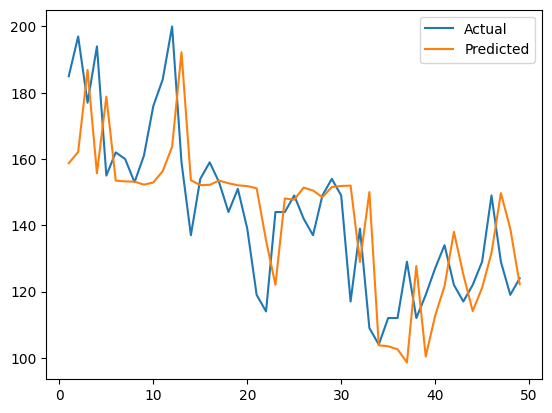

In [45]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [46]:
val_predictions = model5.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,150.845840,122.0
1,132.429947,137.0
2,147.687119,109.0
3,103.870949,97.0
4,100.090828,122.0
...,...,...
274,158.181625,187.0
275,171.569901,180.0
276,159.342422,167.0
277,154.708694,157.0


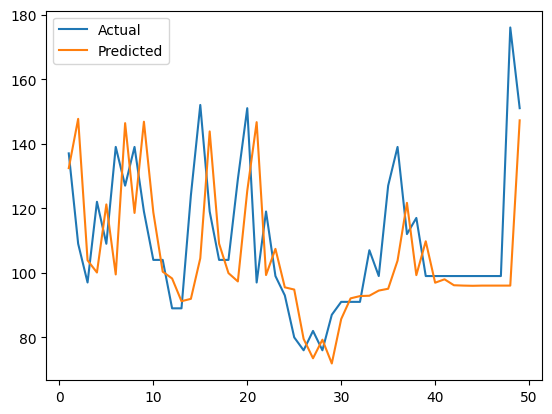

In [47]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [48]:
test_predictions = model5.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,152.259995,159.0
1,152.356628,184.0
2,178.889267,159.0
3,153.264450,164.0
4,152.957504,151.0
...,...,...
275,253.439209,287.0
276,254.329666,249.0
277,251.658890,272.0
278,253.463348,234.0


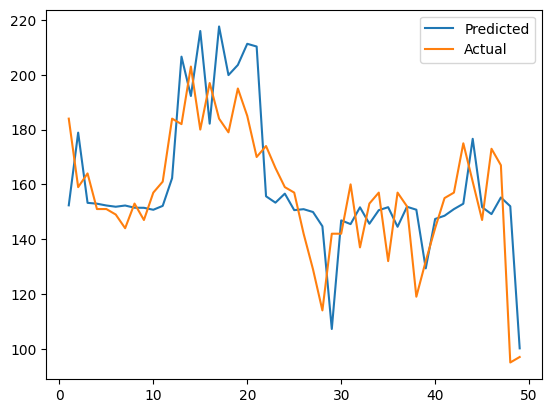

In [49]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

### Hybrid CNN + LSTM¶

In [50]:
model8 = Sequential()
model8.add(InputLayer((6, 5)))  # 6 timestamps, 6 features
model8.add(Conv1D(32, kernel_size=2, activation='relu'))  # 1D Convolutional Layer
model8.add(MaxPooling1D(pool_size=2))  # Max Pooling
model8.add(LSTM(64, activation='relu', return_sequences=False))  
model8.add(Dropout(0.3))  
model8.add(Dense(32, activation='relu'))  
model8.add(Dense(1, activation='linear'))  

cp8 = ModelCheckpoint('/kaggle/working/model8.keras', save_best_only=True)

model8.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), 
               metrics=[RootMeanSquaredError()])

model8.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp8])

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 5127.0405 - root_mean_squared_error: 71.5983 - val_loss: 8175.7974 - val_root_mean_squared_error: 90.4201
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4899.5889 - root_mean_squared_error: 69.9682 - val_loss: 8340.7256 - val_root_mean_squared_error: 91.3276
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4480.5093 - root_mean_squared_error: 66.8770 - val_loss: 7896.0298 - val_root_mean_squared_error: 88.8596
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3885.6519 - root_mean_squared_error: 62.3068 - val_loss: 7282.4126 - val_root_mean_squared_error: 85.3371
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3296.3960 - root_mean_squared_error: 57.3857 - val_loss: 7053.2280 - val_root_mean_squared_error: 83.9835
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3094.4685 - root_mean_squared_error: 55.6011 - val_loss: 6272.1162 - val_root_mean_squared_error: 79.1967
Epoch 7/10

In [51]:
from tensorflow.keras.models import load_model
model8 = load_model('/kaggle/working/model8.keras')

In [53]:
# Evaluate the model on the train data
train_result = model8.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 41.3847
Mean Squared Error (MSE): 2774.6753
Root Mean Squared Error (RMSE): 52.6752
R-squared (Accuracy): 0.3629


In [54]:
# Evaluate the model on the validation data
val_result = model8.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 54.6688
Mean Squared Error (MSE): 4827.2956
Root Mean Squared Error (RMSE): 69.4787
R-squared (Accuracy): 0.0643


In [55]:
# Evaluate the model on the test data
test_result = model8.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 42.9768
Mean Squared Error (MSE): 2768.3281
Root Mean Squared Error (RMSE): 52.6149
R-squared (Accuracy): 0.0917


In [56]:
train_predictions = model8.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Train Predictions,Actuals
0,120.657082,182.0
1,118.606560,185.0
2,121.343178,197.0
3,123.222076,177.0
4,127.091652,194.0
...,...,...
2273,110.626991,127.0
2274,108.272469,144.0
2275,104.913246,147.0
2276,99.979095,153.0


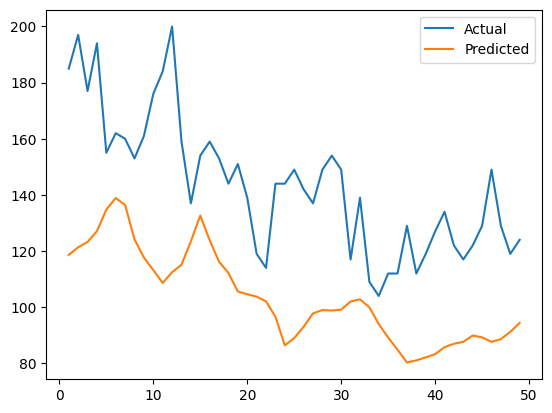

In [57]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [58]:
val_predictions = model8.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,104.155800,122.0
1,102.460136,137.0
2,100.046913,109.0
3,94.594872,97.0
4,88.790688,122.0
...,...,...
274,141.401398,187.0
275,137.584366,180.0
276,129.640289,167.0
277,131.708572,157.0


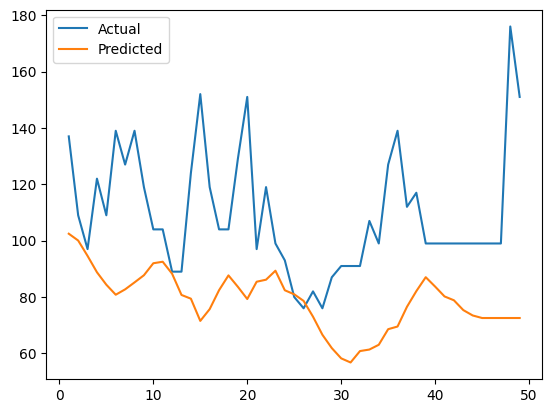

In [59]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [60]:
test_predictions = model8.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,108.706894,159.0
1,108.994926,184.0
2,108.145683,159.0
3,113.245979,164.0
4,113.146736,151.0
...,...,...
275,164.049881,287.0
276,161.691040,249.0
277,164.099838,272.0
278,166.159149,234.0


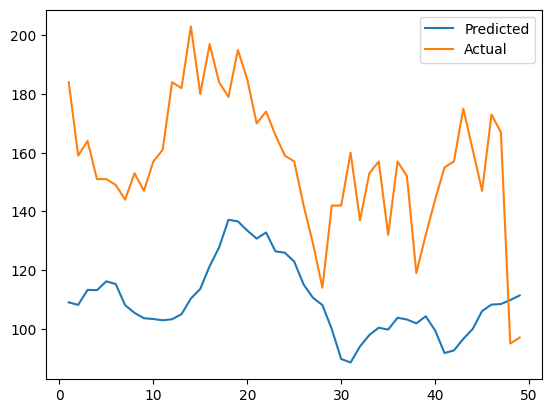

In [61]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

### Advanced Stacked GRU + Dense¶

In [62]:
model9 = Sequential()
model9.add(InputLayer((6, 5)))  # 6 timestamps, 6 features
model9.add(BatchNormalization())  # Normalize inputs
model9.add(GRU(128, activation='relu', return_sequences=True))  # GRU layer
model9.add(Dropout(0.3))  # Dropout for regularization
model9.add(GRU(64, activation='relu', return_sequences=False))  # Second GRU layer
model9.add(Dense(32, activation='relu'))  # Fully connected layer
model9.add(Dense(16, activation='relu'))  # Second dense layer
model9.add(Dense(1, activation='linear'))  # Output layer

cp9 = ModelCheckpoint('/kaggle/working/model9.keras', save_best_only=True)

model9.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), 
               metrics=[RootMeanSquaredError()])

model9.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp9])

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 21783.3926 - root_mean_squared_error: 147.5783 - val_loss: 19878.3340 - val_root_mean_squared_error: 140.9906
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 21814.3066 - root_mean_squared_error: 147.6809 - val_loss: 5790698.5000 - val_root_mean_squared_error: 2406.3870
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 11538.7627 - root_mean_squared_error: 106.6272 - val_loss: 27867218.0000 - val_root_mean_squared_error: 5278.9409
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4158.8491 - root_mean_squared_error: 64.4337 - val_loss: 2987119.7500 - val_root_mean_squared_error: 1728.3286
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3227.4988 - root_mean_squared_error: 56.7676 - val_loss: 206503.3750 - val_root_mean_squared_error: 454.4264
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2594.5791 - root_mean_squared_error: 50.8987 - val_loss: 24494.3809 - val_root_mean

In [63]:
from tensorflow.keras.models import load_model
model9 = load_model('/kaggle/working/model9.keras')

In [64]:
# Evaluate the model on the train data
train_result = model9.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 16.8735
Mean Squared Error (MSE): 618.5070
Root Mean Squared Error (RMSE): 24.8698
R-squared (Accuracy): 0.8580


In [65]:
# Evaluate the model on the validation data
val_result = model9.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 22.5810
Mean Squared Error (MSE): 1013.9302
Root Mean Squared Error (RMSE): 31.8423
R-squared (Accuracy): 0.8035


In [66]:
# Evaluate the model on the test data
test_result = model9.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 13.1428
Mean Squared Error (MSE): 386.2767
Root Mean Squared Error (RMSE): 19.6539
R-squared (Accuracy): 0.8733


In [67]:
train_predictions = model9.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Train Predictions,Actuals
0,180.576080,182.0
1,182.828751,185.0
2,187.837967,197.0
3,195.994919,177.0
4,192.183777,194.0
...,...,...
2273,140.433914,127.0
2274,135.836411,144.0
2275,140.161591,147.0
2276,142.728928,153.0


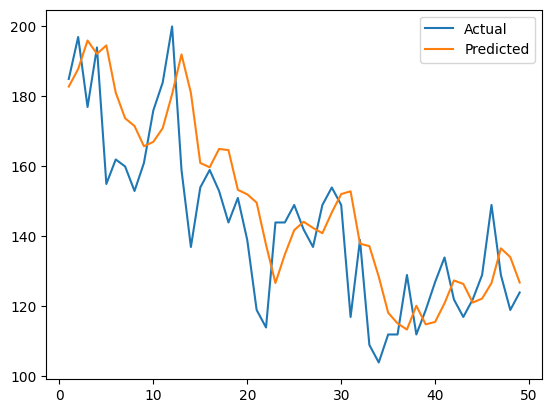

In [68]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [69]:
val_predictions = model9.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,152.421097,122.0
1,134.111832,137.0
2,134.602463,109.0
3,124.005867,97.0
4,112.958054,122.0
...,...,...
274,170.383926,187.0
275,178.496414,180.0
276,169.159363,167.0
277,175.745377,157.0


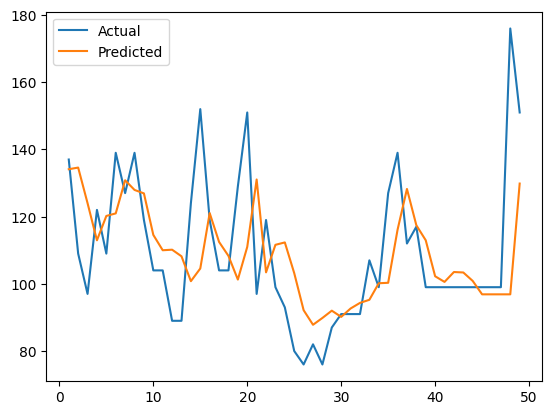

In [70]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [71]:
test_predictions = model9.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,154.681168,159.0
1,158.614395,184.0
2,177.383255,159.0
3,166.908386,164.0
4,170.429092,151.0
...,...,...
275,247.985519,287.0
276,253.009857,249.0
277,256.443085,272.0
278,246.372726,234.0


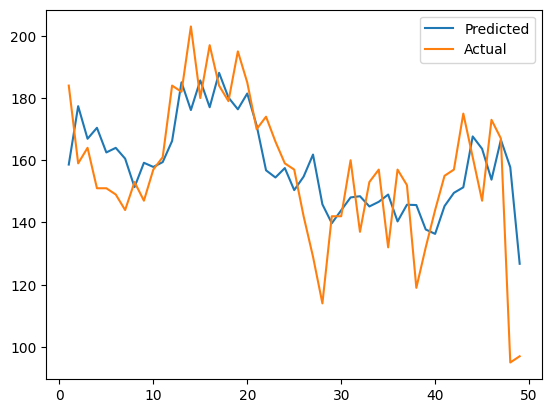

In [72]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

# 4. Load Model and export dataset

In [73]:
from joblib import load


# Load the model
model_path = '/kaggle/working/models/best_model_neural_network_20250128_033113.joblib'
model = load(model_path)

# Predict using the model
predictions = model.predict(data)

# Add predictions and location to the original DataFrame
data['predictions'] = predictions

# Function to classify AQI levels
def classify_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# Apply AQI bucket classification to the predictions column
data['AQI Bucket'] = data['AQI'].apply(classify_aqi)
data['Country_City'] = "Bangladesh_Dhaka"

# Save the updated DataFrame to CSV
os.makedirs('/kaggle/working', exist_ok=True)

# Save to CSV
data.to_csv('/kaggle/working/bangladesh_dhaka_predictions.csv')
